In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/kaggle/input/zameen/Entities.csv')
df.head(2)

,Unnamed: 0,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,purpose,bedrooms,date_added,agency,agent,Total_Area
0,0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,For Sale,2,2/4/2019,NaN,NaN,1089.004
1,1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,For Sale,3,5/4/2019,NaN,NaN,15246.056


In [3]:
df.columns

Index(['Unnamed: 0', 'property_id', 'location_id', 'page_url', 'property_type',
       'price', 'location', 'city', 'province_name', 'latitude', 'longitude',
       'baths', 'purpose', 'bedrooms', 'date_added', 'agency', 'agent',
       'Total_Area'],
      dtype='object')

In [4]:
df.drop(['Unnamed: 0', 'property_id', 'location_id', 'page_url','latitude','longitude','agency', 'location','agent'],axis = 1, inplace = True)
df.head(2)

,property_type,price,city,province_name,baths,purpose,bedrooms,date_added,Total_Area
0,Flat,10000000,Islamabad,Islamabad Capital,2,For Sale,2,2/4/2019,1089.004
1,Flat,6900000,Islamabad,Islamabad Capital,3,For Sale,3,5/4/2019,15246.056


In [5]:
df.shape

(168446, 9)

In [6]:
df.isnull().sum()

property_type    0
price            0
city             0
province_name    0
baths            0
purpose          0
bedrooms         0
date_added       0
Total_Area       0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168446 entries, 0 to 168445
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   property_type  168446 non-null  object 
 1   price          168446 non-null  int64  
 2   city           168446 non-null  object 
 3   province_name  168446 non-null  object 
 4   baths          168446 non-null  int64  
 5   purpose        168446 non-null  object 
 6   bedrooms       168446 non-null  int64  
 7   date_added     168446 non-null  object 
 8   Total_Area     168446 non-null  float64
dtypes: float64(1), int64(3), object(5)
memory usage: 11.6+ MB


In [8]:
df.describe(include = 'all')

,property_type,price,city,province_name,baths,purpose,bedrooms,date_added,Total_Area
count,168446,1.684460e+05,168446,168446,168446.000000,168446,168446.000000,168446,1.684460e+05
unique,7,NaN,5,3,NaN,2,NaN,124,NaN
top,House,NaN,Karachi,Punjab,NaN,For Sale,NaN,7/3/2019,NaN
freq,105468,NaN,60484,70536,NaN,120655,NaN,9485,NaN
mean,NaN,1.776576e+07,NaN,NaN,2.874227,NaN,3.179422,NaN,1.394239e+04
std,NaN,3.531003e+07,NaN,NaN,2.463400,NaN,1.971401,NaN,8.623647e+05
min,NaN,0.000000e+00,NaN,NaN,0.000000,NaN,0.000000,NaN,0.000000e+00
25%,NaN,1.750000e+05,NaN,NaN,0.000000,NaN,2.000000,NaN,1.905757e+03
50%,NaN,8.500000e+06,NaN,NaN,3.000000,NaN,3.000000,NaN,4.356016e+03
75%,NaN,1.950000e+07,NaN,NaN,4.000000,NaN,4.000000,NaN,1.197904e+04


In [9]:
df.property_type.unique()

array(['Flat', 'House', 'Penthouse', 'Farm House', 'Lower Portion',
       'Upper Portion', 'Room'], dtype=object)

In [10]:
df.city.unique()

array(['Islamabad', 'Lahore', 'Faisalabad', 'Rawalpindi', 'Karachi'],
      dtype=object)

In [11]:
df.province_name.unique()

array(['Islamabad Capital', 'Punjab', 'Sindh'], dtype=object)

In [12]:
df.purpose.unique()

array(['For Sale', 'For Rent'], dtype=object)

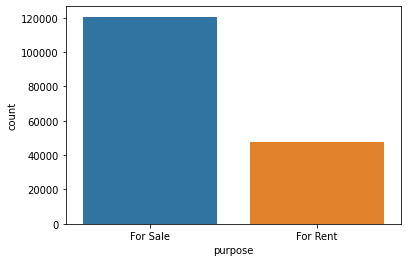

In [13]:
sns.countplot(x ='purpose', data = df)
plt.show()

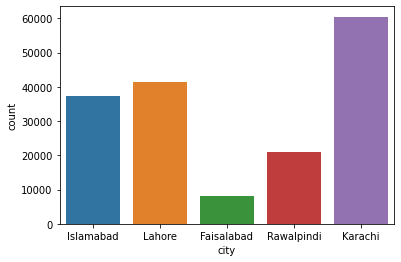

In [14]:
sns.countplot(x ='city', data = df)
plt.show()

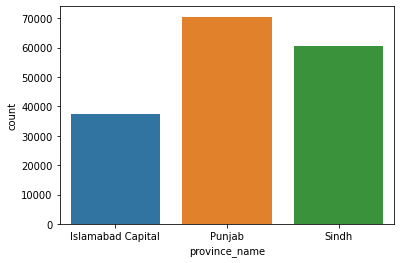

In [15]:
sns.countplot(x ='province_name', data = df)
plt.show()

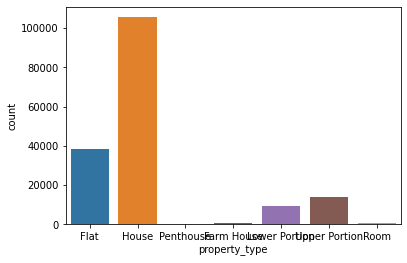

In [16]:
sns.countplot(x ='property_type', data = df)
plt.show()

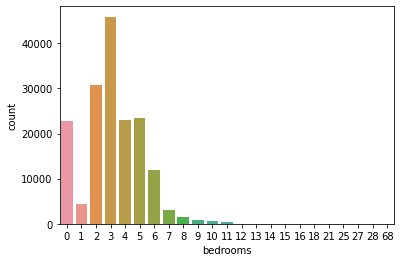

In [17]:
sns.countplot(x ='bedrooms', data = df)
plt.show()

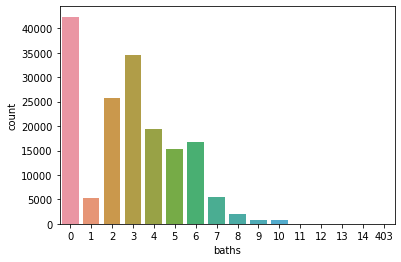

In [18]:
sns.countplot(x ='baths', data = df)
plt.show()

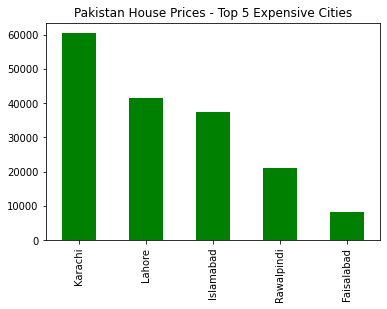

In [19]:
df['city'].value_counts().head(5).plot(kind = 'bar', color = 'g')
plt.title('Pakistan House Prices - Top 5 Expensive Cities')
plt.show()

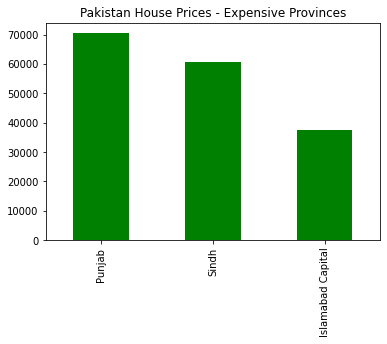

In [20]:
df['province_name'].value_counts().head(5).plot(kind = 'bar', color = 'g')
plt.title('Pakistan House Prices - Expensive Provinces')
plt.show()

In [21]:
# splitting dataset on the basis of rent and sale
df_rent = df[df['purpose']=='For Rent']
df_sale = df[df['purpose']=='For Sale']

## Working with Sales Dataset

In [22]:
df1 = df_sale.sample(3000)
df1.shape

(3000, 9)

In [23]:
df1.describe(include = 'all')

,property_type,price,city,province_name,baths,purpose,bedrooms,date_added,Total_Area
count,3000,3.000000e+03,3000,3000,3000.000000,3000,3000.000000,3000,3000.000000
unique,6,NaN,5,3,NaN,1,NaN,89,NaN
top,House,NaN,Karachi,Punjab,NaN,For Sale,NaN,7/3/2019,NaN
freq,2192,NaN,1132,1453,NaN,3000,NaN,170,NaN
mean,NaN,2.451456e+07,NaN,NaN,3.045667,NaN,3.367000,NaN,9705.826200
std,NaN,3.930190e+07,NaN,NaN,2.292306,NaN,1.962208,NaN,21783.505427
min,NaN,3.700000e+04,NaN,NaN,0.000000,NaN,0.000000,NaN,0.000000
25%,NaN,7.000000e+06,NaN,NaN,1.000000,NaN,2.000000,NaN,1633.506000
50%,NaN,1.305000e+07,NaN,NaN,3.000000,NaN,3.000000,NaN,4083.765000
75%,NaN,2.600000e+07,NaN,NaN,5.000000,NaN,5.000000,NaN,11434.542000


In [24]:
df1.isnull().sum()

property_type    0
price            0
city             0
province_name    0
baths            0
purpose          0
bedrooms         0
date_added       0
Total_Area       0
dtype: int64

In [25]:
for column in df1.columns:
    print(df1[column].value_counts())
    print('*'*20)

House            2192
Flat              706
Upper Portion      60
Lower Portion      24
Farm House         15
Penthouse           3
Name: property_type, dtype: int64
********************
15000000    62
6000000     59
14000000    59
6500000     58
8000000     56
            ..
9530000      1
5250000      1
2950000      1
63000000     1
4666000      1
Name: price, Length: 396, dtype: int64
********************
Karachi       1132
Lahore        1024
Islamabad      415
Rawalpindi     320
Faisalabad     109
Name: city, dtype: int64
********************
Punjab               1453
Sindh                1132
Islamabad Capital     415
Name: province_name, dtype: int64
********************
0     709
3     561
2     426
4     373
6     361
5     318
7      99
1      86
8      44
10     16
9       7
Name: baths, dtype: int64
********************
For Sale    3000
Name: purpose, dtype: int64
********************
3     750
2     510
5     504
4     469
0     357
6     233
1      57
7      51
8      32
9

### Handling Columns 'baths' and 'bedrooms'

<AxesSubplot:>

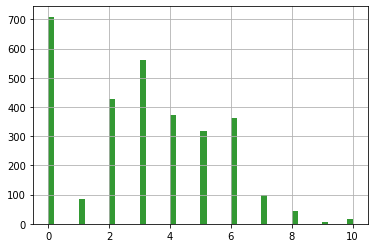

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111)
df1['baths'].hist(bins = 50, ax =ax, color = 'green', alpha = 0.8 )

In [27]:
df1[df1['baths']==0]

,property_type,price,city,province_name,baths,purpose,bedrooms,date_added,Total_Area
78203,House,8000000,Faisalabad,Punjab,0,For Sale,0,6/16/2019,1361.255
105812,House,26000000,Lahore,Punjab,0,For Sale,5,6/27/2019,3267.012
113340,House,6000000,Faisalabad,Punjab,0,For Sale,0,7/2/2019,1361.255
2421,House,10800000,Rawalpindi,Punjab,0,For Sale,5,7/4/2019,1905.757
161975,House,6000000,Rawalpindi,Punjab,0,For Sale,2,7/16/2019,1361.255
...,...,...,...,...,...,...,...,...,...
165743,House,9000000,Rawalpindi,Punjab,0,For Sale,0,7/17/2019,1361.255
130960,House,42500000,Lahore,Punjab,0,For Sale,5,7/4/2019,5445.000
58227,House,26000000,Karachi,Sindh,0,For Sale,4,4/6/2019,13068.048
133912,House,28000000,Karachi,Sindh,0,For Sale,0,7/2/2019,2178.008


In [28]:
int(df1['baths'].mean())

3

In [29]:
# Replacing 0 values with mean
df1['baths'].replace(0,int(df1['baths'].mean()),inplace = True)

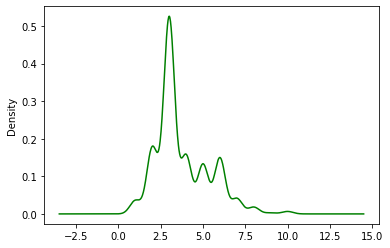

In [30]:
df1['baths'].plot.density(color='green')
plt.show()

<AxesSubplot:xlabel='baths', ylabel='price'>

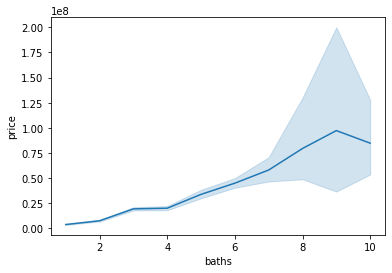

In [31]:
sns.lineplot(x = 'baths', y = 'price', data = df1)

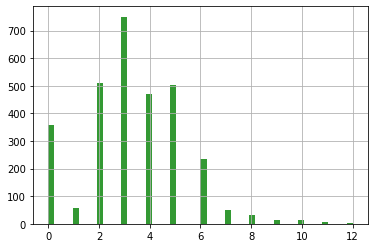

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111)
df1['bedrooms'].hist(bins = 50, ax =ax, color = 'green', alpha = 0.8 )
plt.show()

In [33]:
df1[df1['bedrooms']==0]

,property_type,price,city,province_name,baths,purpose,bedrooms,date_added,Total_Area
78203,House,8000000,Faisalabad,Punjab,3,For Sale,0,6/16/2019,1361.255
113340,House,6000000,Faisalabad,Punjab,3,For Sale,0,7/2/2019,1361.255
82590,House,180000000,Karachi,Sindh,3,For Sale,0,6/7/2019,21780.000
90767,House,12000000,Lahore,Punjab,3,For Sale,0,6/19/2019,816.753
27227,Flat,7000000,Karachi,Sindh,3,For Sale,0,12/19/2018,15246.056
...,...,...,...,...,...,...,...,...,...
112088,House,7100000,Islamabad,Islamabad Capital,3,For Sale,0,6/30/2019,2178.008
25246,Farm House,6000000,Lahore,Punjab,3,For Sale,0,12/5/2018,10890.000
165743,House,9000000,Rawalpindi,Punjab,3,For Sale,0,7/17/2019,1361.255
133912,House,28000000,Karachi,Sindh,3,For Sale,0,7/2/2019,2178.008


In [34]:
# Replacing 0 values with mean
df1['bedrooms'].replace(0,int(df1['bedrooms'].mean()),inplace = True)

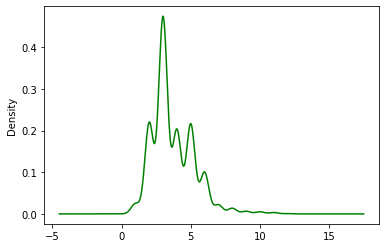

In [35]:
df1['bedrooms'].plot.density(color='green')
plt.show()

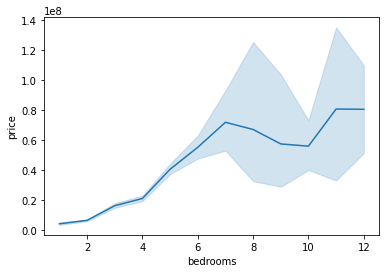

In [36]:
sns.lineplot(x = 'bedrooms', y = 'price', data = df1)
plt.show()

In [37]:
df1.describe()

,price,baths,bedrooms,Total_Area
count,3.000000e+03,3000.000000,3000.000000,3000.000000
mean,2.451456e+07,3.754667,3.724000,9705.826200
std,3.930190e+07,1.599791,1.545732,21783.505427
min,3.700000e+04,1.000000,1.000000,0.000000
25%,7.000000e+06,3.000000,3.000000,1633.506000
50%,1.305000e+07,3.000000,3.000000,4083.765000
75%,2.600000e+07,5.000000,5.000000,11434.542000
max,8.500000e+08,10.000000,12.000000,680625.000000


### Handling Column 'price'

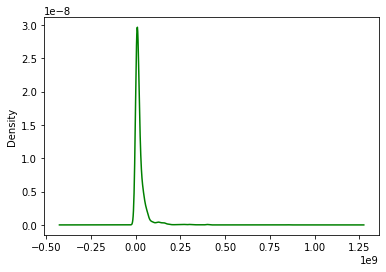

In [38]:
df1['price'].plot.density(color='green')
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


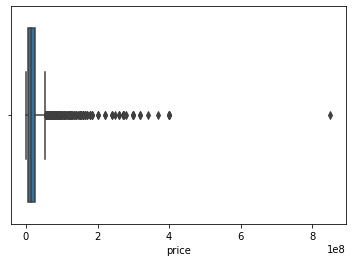

In [39]:
sns.boxplot(df1['price'])
plt.show()

In [40]:
print(df1.price.max()) # Remove this outlier
df2 = df1[df1['price'] < 400000000] 

850000000


In [41]:
df2.describe()

,price,baths,bedrooms,Total_Area
count,2.995000e+03,2995.000000,2995.000000,2995.000000
mean,2.373746e+07,3.749917,3.720534,9542.044608
std,3.362521e+07,1.594254,1.543089,20982.661338
min,3.700000e+04,1.000000,1.000000,0.000000
25%,7.000000e+06,3.000000,3.000000,1633.506000
50%,1.300000e+07,3.000000,3.000000,3811.514000
75%,2.550000e+07,5.000000,5.000000,11434.542000
max,3.700000e+08,10.000000,12.000000,680625.000000


In [42]:
df2.head(2)

,property_type,price,city,province_name,baths,purpose,bedrooms,date_added,Total_Area
78203,House,8000000,Faisalabad,Punjab,3,For Sale,3,6/16/2019,1361.255
76853,House,18500000,Lahore,Punjab,6,For Sale,5,6/12/2019,2722.510


In [43]:
df2.drop(['purpose','date_added'],axis = 1, inplace = True)
df2.shape

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(2995, 7)

In [44]:
df2.head(2)

,property_type,price,city,province_name,baths,bedrooms,Total_Area
78203,House,8000000,Faisalabad,Punjab,3,3,1361.255
76853,House,18500000,Lahore,Punjab,6,5,2722.510


In [45]:
df2.describe()

,price,baths,bedrooms,Total_Area
count,2.995000e+03,2995.000000,2995.000000,2995.000000
mean,2.373746e+07,3.749917,3.720534,9542.044608
std,3.362521e+07,1.594254,1.543089,20982.661338
min,3.700000e+04,1.000000,1.000000,0.000000
25%,7.000000e+06,3.000000,3.000000,1633.506000
50%,1.300000e+07,3.000000,3.000000,3811.514000
75%,2.550000e+07,5.000000,5.000000,11434.542000
max,3.700000e+08,10.000000,12.000000,680625.000000


### Handling Column 'Total_Area'

<AxesSubplot:ylabel='Density'>

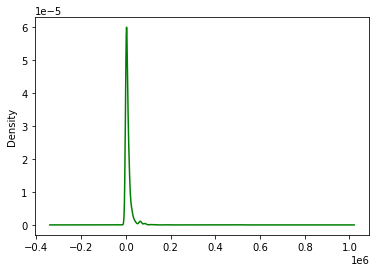

In [46]:
df2['Total_Area'].plot.density(color='green')

In [47]:
# Replacing 0 values with mean
df2['Total_Area'].replace(0,df2['Total_Area'].mean(),inplace = True)

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


<AxesSubplot:ylabel='Density'>

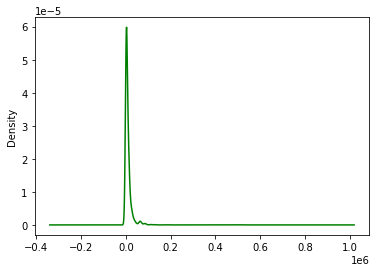

In [48]:
df2['Total_Area'].plot.density(color='green')

In [49]:
df2.describe()

,price,baths,bedrooms,Total_Area
count,2.995000e+03,2995.000000,2995.000000,2995.000000
mean,2.373746e+07,3.749917,3.720534,9545.230600
std,3.362521e+07,1.594254,1.543089,20981.936413
min,3.700000e+04,1.000000,1.000000,272.251000
25%,7.000000e+06,3.000000,3.000000,1633.506000
50%,1.300000e+07,3.000000,3.000000,4083.765000
75%,2.550000e+07,5.000000,5.000000,11434.542000
max,3.700000e+08,10.000000,12.000000,680625.000000


## Handling Categorical Data - One Hot Encoding

In [50]:
df2.head(2)

,property_type,price,city,province_name,baths,bedrooms,Total_Area
78203,House,8000000,Faisalabad,Punjab,3,3,1361.255
76853,House,18500000,Lahore,Punjab,6,5,2722.510


In [51]:
df2.property_type.unique()

array(['House', 'Upper Portion', 'Flat', 'Lower Portion', 'Farm House',
       'Penthouse'], dtype=object)

In [52]:
# property_type - Column

dummies=pd.get_dummies(df2['property_type'],drop_first=True)

In [53]:
dummies

,Flat,House,Lower Portion,Penthouse,Upper Portion
78203,0,1,0,0,0
76853,0,1,0,0,0
29337,0,1,0,0,0
105812,0,1,0,0,0
113340,0,1,0,0,0
...,...,...,...,...,...
130960,0,1,0,0,0
58227,0,1,0,0,0
133912,0,1,0,0,0
110443,0,0,0,0,1


In [54]:
df=pd.concat([df2,dummies],axis=1)
df.head(2)

,property_type,price,city,province_name,baths,bedrooms,Total_Area,Flat,House,Lower Portion,Penthouse,Upper Portion
78203,House,8000000,Faisalabad,Punjab,3,3,1361.255,0,1,0,0,0
76853,House,18500000,Lahore,Punjab,6,5,2722.510,0,1,0,0,0


In [55]:
df.columns

Index(['property_type', 'price', 'city', 'province_name', 'baths', 'bedrooms',
       'Total_Area', 'Flat', 'House', 'Lower Portion', 'Penthouse',
       'Upper Portion'],
      dtype='object')

In [56]:
# City - Column

dummies = pd.get_dummies(df['city'],drop_first=True)

In [57]:
df = pd.concat([df, dummies], axis = 1)
df.columns

Index(['property_type', 'price', 'city', 'province_name', 'baths', 'bedrooms',
       'Total_Area', 'Flat', 'House', 'Lower Portion', 'Penthouse',
       'Upper Portion', 'Islamabad', 'Karachi', 'Lahore', 'Rawalpindi'],
      dtype='object')

In [58]:
# province_name - Column

dummies = pd.get_dummies(df['province_name'],drop_first=True)

In [59]:
df = pd.concat([df, dummies], axis = 1)
df.columns

Index(['property_type', 'price', 'city', 'province_name', 'baths', 'bedrooms',
       'Total_Area', 'Flat', 'House', 'Lower Portion', 'Penthouse',
       'Upper Portion', 'Islamabad', 'Karachi', 'Lahore', 'Rawalpindi',
       'Punjab', 'Sindh'],
      dtype='object')

In [60]:
df.head(2)

,property_type,price,city,province_name,baths,bedrooms,Total_Area,Flat,House,Lower Portion,Penthouse,Upper Portion,Islamabad,Karachi,Lahore,Rawalpindi,Punjab,Sindh
78203,House,8000000,Faisalabad,Punjab,3,3,1361.255,0,1,0,0,0,0,0,0,0,1,0
76853,House,18500000,Lahore,Punjab,6,5,2722.510,0,1,0,0,0,0,0,1,0,1,0


In [61]:
df.drop(['property_type','city','province_name'], axis = 1, inplace = True)
df.head(2)

,price,baths,bedrooms,Total_Area,Flat,House,Lower Portion,Penthouse,Upper Portion,Islamabad,Karachi,Lahore,Rawalpindi,Punjab,Sindh
78203,8000000,3,3,1361.255,0,1,0,0,0,0,0,0,0,1,0
76853,18500000,6,5,2722.510,0,1,0,0,0,0,0,1,0,1,0


## Model Training 

In [62]:
X = df.drop(['price'],axis =1)
y = df['price']

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)    #20% data is for evaluation of Model performance

In [64]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled= scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [65]:
from sklearn.metrics import mean_squared_error
def rmse(y_test, y_pred):
  return np.sqrt(mean_squared_error(y_test, y_pred))

In [66]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_train,y_train)

0.2928188433439044

In [67]:
lr_rmse = rmse(y_test, lr.predict(X_test))
lr_test=lr.score(X_test, y_test)
lr_rmse,lr_test

(33968428.528929755, 0.22642908688863528)

In [68]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
rfr.score(X_train, y_train)

0.9146112535714459

In [69]:
rfr_rmse = rmse(y_test, rfr.predict(X_test))
rfr_score=rfr.score(X_test,y_test)
rfr_score, rfr_rmse

(0.6494946963501976, 22865077.979625985)

In [70]:
!pip install xgboost

In [71]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score

In [72]:
xgb=XGBRegressor(ets=0.1,gamma=10)

In [73]:

xgb.fit(X_train,y_train)
xgb.score(X_train, y_train)

[06:11:11] WARNING: ../src/learner.cc:627: 
Parameters: { "ets" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




0.9449692714616073

In [74]:

xgb_rmse = rmse(y_test, xgb.predict(X_test))
xgb_score=xgb.score(X_test,y_test)
xgb_score, xgb_rmse

(0.6316700958943654, 23439259.105594397)

In [75]:
print('XGBoost',np.mean(cross_val_score(xgb,X_train,y_train,cv=10)))

[06:11:12] WARNING: ../src/learner.cc:627: 
Parameters: { "ets" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[06:11:12] WARNING: ../src/learner.cc:627: 
Parameters: { "ets" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[06:11:13] WARNING: ../src/learner.cc:627: 
Parameters: { "ets" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wro

#### Automatically Select Best Model

In [76]:
!pip install flaml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.6/208.6 kB 5.2 MB/s eta 0:00:00


In [77]:
from flaml import AutoML

In [78]:
#initialize AutoML instance
automl=AutoML()

In [79]:
#specify automl goal and constraint
automl_settings={"time_budget":10,  # in seconds
                 "metric":'r2',
                 "task":'regression',
                 "log_file_name":"house"}

#train with labeled input data
automl.fit(X_train=X_train, y_train=y_train, **automl_settings)
#Predict
print(automl.predict(X_train))
#Export the best model
print(automl.model)

[flaml.automl: 11-27 06:11:29] {2599} INFO - task = regression
[flaml.automl: 11-27 06:11:29] {2601} INFO - Data split method: uniform
[flaml.automl: 11-27 06:11:29] {2604} INFO - Evaluation method: holdout
[flaml.automl: 11-27 06:11:29] {2726} INFO - Minimizing error metric: 1-r2
[flaml.automl: 11-27 06:11:30] {2870} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'catboost', 'xgboost', 'extra_tree', 'xgb_limitdepth']
[flaml.automl: 11-27 06:11:30] {3166} INFO - iteration 0, current learner lgbm
[flaml.automl: 11-27 06:11:30] {3297} INFO - Estimated sufficient time budget=1285s. Estimated necessary time budget=11s.
[flaml.automl: 11-27 06:11:30] {3349} INFO -  at 0.4s,	estimator lgbm's best error=0.8572,	best estimator lgbm's best error=0.8572
[flaml.automl: 11-27 06:11:30] {3166} INFO - iteration 1, current learner lgbm
[flaml.automl: 11-27 06:11:30] {3349} INFO -  at 0.4s,	estimator lgbm's best error=0.8572,	best estimator lgbm's best error=0.8572
[flaml.automl: 11-27 06:11

[48654610.67089454  8974578.86519934  4502313.4082547  ...
  5273770.03220428 46215588.34669231 25587656.64047103]


In [80]:
!pip install lightgbm

In [81]:
from lightgbm import LGBMRegressor
lgb=LGBMRegressor()
lgb.fit(X_train,y_train)
lgb.score(X_train, y_train)

0.7950615493362931

In [82]:
lgb_rmse = rmse(y_test, lgb.predict(X_test))
lgb_score=lr.score(X_test,y_test)
lgb_score, lgb_rmse

(0.22642908688863528, 20588737.576678872)